In [1]:
samples = 10

In [2]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import numpy as np

def findDirs(n):
    dirs = []
    i = 0
    for i in range(1,n):
        dirs.append("../../data/weakscaling/" + str(i)+"/")
    return dirs

def gatherJsons(dirs, runs):
    jsons = []
    for dir in dirs:
        for i in range(runs):
            with open(dir + "/" +str(i)+"/metadata.json") as f:
                jsons.append(json.load(f))
    return jsons


def gatherSolveTime(jsons, runs):
    x = np.empty((len(jsons) // runs, runs))
    for i, data in enumerate(jsons):
        x[(i // runs), (i % runs)] = data["residual log"][-1]["time"]
    return pd.DataFrame(x, columns=[str(i) for i in range(1, runs + 1)])


In [5]:
states = list(range(1,13))+[24,36,48]
dirs=[("../../data/weakscaling/"+str(i)+"/") for i in states]
data=gatherSolveTime(gatherJsons(dirs,1),1)



Text(0, 0.5, 'Solve time in seconds')

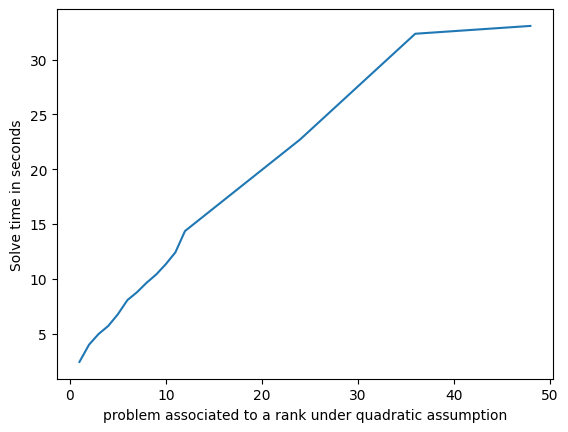

In [11]:
plt.plot(states,data.to_numpy())
plt.xlabel("problem associated to a rank under quadratic assumption")
plt.ylabel("Solve time in seconds")

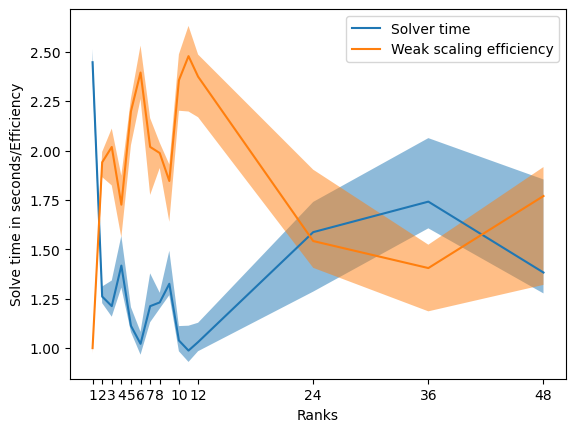

In [40]:
plt.plot(states,np.mean(data.to_numpy(),axis=1),label="Solver time")
plt.fill_between(x=states,y1=np.min(data,axis=1),y2=np.max(data,axis=1), alpha=0.5)
plt.plot(states,np.mean(data.to_numpy(),axis=1)[0]/np.mean(data.to_numpy(),axis=1), label="Weak scaling efficiency")
plt.fill_between(x=states,y1=np.min(np.mean(data.to_numpy(),axis=1)[0]/data,axis=1),y2=np.max(np.mean(data.to_numpy(),axis=1)[0]/data,axis=1), alpha=0.5)
plt.xlabel("Ranks")
plt.ylabel("Solve time in seconds/Efficiency")
plt.xticks(states[0:8]+states[9:13:2]+states[12:])
plt.legend()
plt.show()

In [10]:
def wscale(x,a):
    return a*x**2

[0.00237095]


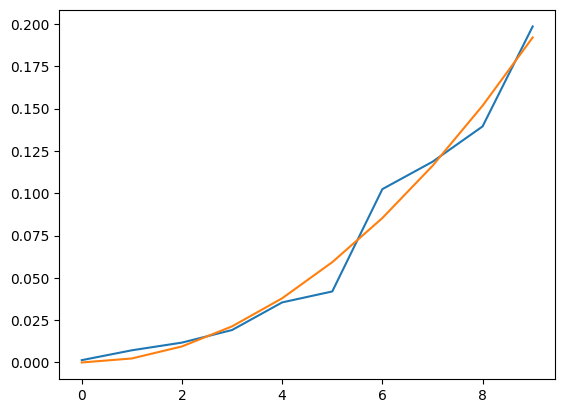

In [67]:
from scipy.optimize import curve_fit

popt, _ = curve_fit(wscale, data.index,data.to_numpy().flatten())
f=popt
y=np.array([wscale(i,f) for i in range(samples)])
print(f)
x = [i**2 for i in range(10, 8011, 1000)]
plt.plot(data)
plt.plot(range(samples),y)

In [34]:
data.to_numpy()

array([[0.00613999],
       [0.01800394],
       [0.03703094],
       [0.05231619],
       [0.13590312],
       [0.15825105],
       [0.32399297],
       [0.27369785],
       [0.30080009]])